# <font color=darkcyan>  Machine Learning in Python </font>

### <font color=darkorange> Random Forests & Neural networks</font>

## 2. <font color=darkred> Handwritten digit recognition with MNIST </font>

This section aims at using neural networks to perform classification on the [MNIST](http://yann.lecun.com/exdb/mnist) dataset.
This dataset contains images representing handwritten digits.  Each image is made of 28 x 28 pixels, and each pixel is represented by an integer (gray level).  These arrays can be flattened into vectors of 28 x 28 = 784 numbers.
Each image is then a 784-dimensional vector.  Visualisations of this vector space are given here: [http://colah.github.io/posts/2014-10-Visualizing-MNIST/](http://colah.github.io/posts/2014-10-Visualizing-MNIST/).

The labels in $\{0, 1, 2, \ldots, 9\}$ can represented using one-hot encoding: labels in $\{0, 1, 2, \ldots, 9\}$ are replaced by labels in $\{ 0, 1\}^{10}$, namely $0$ is replaced by $(1, 0, \ldots 0)$, $1$ is replaced by $(0, 1, 0, \ldots 0)$, $2$ is replaced by $(0, 0, 1, 0, \ldots, 0)$, etc.

Also, MNIST data is grayscale pixels in $\{0, \ldots, 255\}$ which should be normalized to belong to $[0, 1]$.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
from keras.datasets import mnist
#from keras import backend as K
# Number of classes
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train     = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test      = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)
60000 train samples
10000 test samples


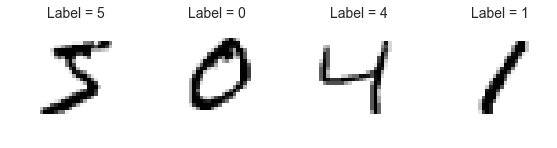

In [46]:
plt.figure(figsize=(8, 2))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i].reshape(28, 28), 
               interpolation="none", cmap="gray_r")
    plt.title('Label = %d' % y_train[i], fontsize=14)
    plt.axis("off")
plt.tight_layout()

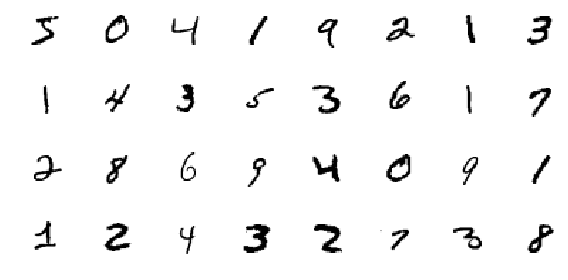

In [47]:
n_rows = 4
n_cols = 8
plt.figure(figsize=(8, 4))
for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(x_train[i].reshape(28, 28),
               interpolation="none", cmap="gray_r")
    plt.axis("off")
plt.tight_layout()

In [48]:
print(np.array2string(x_train[0].astype(np.int).reshape(28, 28),max_line_width=150))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [49]:
x_train /= 255
x_test /= 255
print(x_train.min(axis=None), x_train.max(axis=None))

0.0 1.0


In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### <font color=darkred> Softmax regression </font>

The aim is to predict the digit $k$ represented by each picture, for $k \in \{0, \ldots, 9\}$.

Softmax regression provides a model for the probability that an input image $x$ is associated with each class using a simple linear model.  It is assumed that the probability to belong to the class $k$ can be expressed by a weigthed sum of the pixel intensities, with weights $W_{k, 1}, \ldots, W_{k, 784}$ and plus a bias $b_k$ capturing some variability independent of the input:
$$
\text{score}_k(x_i) = \sum_{j=1}^{784} W_{k, j} x_j + b_k,
$$
These scores are sometimes called the "logits" in the deep learning community.
The softmax function is then used to convert these scores into probabilities $p_k$:
$$
p_k(x_i) = \text{softmax}(\text{score}_k(x_i)) = \frac{\exp(\text{score}_k(x_i))}{\sum_{k'=1}^{10}\exp(\text{score}_{k'}(x_i))}
$$
for $k=1, \ldots, 10$.

To estimatethe model weights $W_{k, j}$ and $b_k$ for $k=1, \ldots, 10$ and $j=1, \ldots, 784$, the loss function is given by the negative log-likelihood (see also the section on gradient based method). The negative log-likelihood of a sample with input $x_i \in \mathbb R^{784}$ and label $y_i \in \{0, 1\}^{10}$, is given by the cross-entropy between the scores $p_k(x_i)$ and the label $y_i$:
$$
- \sum_{k=1}^{10} y_{i, k} \log(p_k(x_i))
$$
Stochastic gradient descent can be used to minimize this loss over small batches of data. 

In [51]:
def softmax(x):
    m = x.max()
    e = np.exp(x - m)
    return e / e.sum()

In [52]:
# Create a model prone to add layers sequentially
model = Sequential()
# flatten the data replaces 28 * 28 matrices by a 784 dimensional vector
# This is always necessary before a fully-connected layer (Dense object)
model.add(Flatten(input_shape=input_shape, name='flatten'))
# add one dense (fully connected layer) with softmax activation function
# As it is the first layer, the input size is mandatory
model.add(Dense(num_classes, activation='softmax', name='dense_softmax'))

# "compile" this model, 
model.compile(
    # specify the loss as the cross-entropy
    loss=keras.losses.categorical_crossentropy,
    # choose the gradient based method to estimate the parameters
    # see https://keras.io/optimizers/ to have an overview of the different options
    # see also section 2 on gradient based methods.
    optimizer=keras.optimizers.Adagrad(),
    # metric to monitor on the test data
    metrics=['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_softmax (Dense)        (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [53]:
batch_size = 64
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4926 - acc: 0.8755 - val_loss: 0.3658 - val_acc: 0.9058
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3625 - acc: 0.9016 - val_loss: 0.3326 - val_acc: 0.9109
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3381 - acc: 0.9077 - val_loss: 0.3181 - val_acc: 0.9118
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3251 - acc: 0.9106 - val_loss: 0.3087 - val_acc: 0.9142
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3165 - acc: 0.9125 - val_loss: 0.3035 - val_acc: 0.9159
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3103 - acc: 0.9142 - val_loss: 0.2987 - val_acc: 0.9177
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3055 - acc: 0.9149 - val_loss: 0.2946 - val_acc

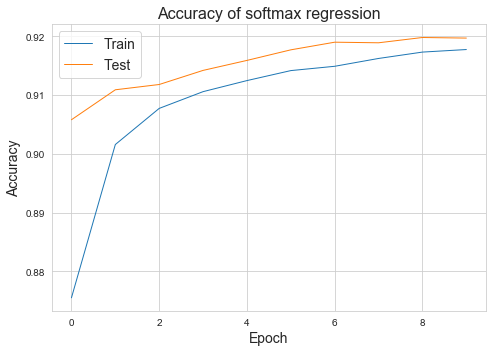

In [54]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['accuracy'], lw=1, label='Train')
plt.plot(history.epoch, history.history['val_accuracy'], lw=1, label='Test')
plt.legend(fontsize=14)
plt.title('Accuracy of softmax regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

In [ ]:
weights, biases = model.get_layer('dense_softmax').get_weights()
imgs = weights.reshape(28, 28, 10)

fig = plt.figure(figsize=(10, 5))
vmin, vmax = imgs.min(), imgs.max()
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    im = imgs[:, :, i]
    mappable = ax.imshow(im, interpolation="nearest", 
                         vmin=vmin, vmax=vmax, cmap='bwr')
    ax.axis('off')
    ax.set_title("%i" % i)
plt.tight_layout()

### <font color=darkred> Feed-Forward Neural Network (FFNN) </font>

The softmax regression of the previous section is a linear model, with 7850 parameters.  It is easy to fit, numerically stable, but might be too simple for some tasks.  The idea underlying neural networks is to have successive "neurons" performing a linear transformation of the input data (depending on a weight matrix and a bia vector) followed by an activation function to design more flexible models with additional parameters.

In [ ]:
# Create the graph for a fully connected feed-forward neural network with one hidden layer 
# with 128 units and a relu activation function. 

In [ ]:
model_ffnn = Sequential()

model_ffnn.add(Flatten(input_shape=input_shape))

model_ffnn.add(Dense(128, activation='relu'))

model_ffnn.add(Dense(num_classes, activation='softmax'))

How many parameters are involved in this model ?

The input size is 28*28 = 724. 

This input is transformed linearly in 128 hidden units in the dense layer which lead to 128*784 + 128 = 100480 parameters to obtain the 128 units.

These units are transformed in a ``softmax`` activation function which adds 10*128 + 10 = 1290 parameters.

This Feed Forward Neural Networks depends on 101770 parameters !

In [ ]:
model_ffnn.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(),
    metrics=['accuracy']
)

model_ffnn.summary()

In [ ]:
batch_size = 32
epochs = 10

# Run the train
history = model_ffnn.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=(x_test, y_test))
score = model_ffnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['accuracy'], lw=3, label='Training')
plt.plot(history.epoch, history.history['val_accuracy'], lw=3, label='Testing')
plt.legend(fontsize=14)
plt.title('Accuracy of NN with fully connected layers', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

## <font color=darkred> Convolutional Neural Network </font>

In practice, increasing the size of hidden layers is not very effective. 
It is often a better idea to add more layers. 
Intuitively, if the observations have a hierarchical structure, adding more layers can be interpreted as a way to learn more levels of abstraction.  For example, in object detection tasks, it is easier to express shapes from edges and objects from shapes, than to express objects from pixels.  Thus, a good design should try to exploit this hierarchy.

In particular cases, such as grid-like data (time series, images), the observations can depend on a pattern which can be associated with different locations of the data. 
For example, an object can be in the middle or the left of the picture. 
Thus, the model has to be translation invariant: it is easier to learn how to recognize an object independently of its location. 

When two inputs might contain the same kind of information, then it is useful to share their weights and estimate the weights jointly for those inputs to learn statistical invariants (things that don't change much on average across time or space). 
Using this concept on images leads to convolutional neural networks (CNNs), on text, it results on recurrent neural networks (RNNs).  When using CNNs, weights are set to a small kernel that is used to perform a convolution across the image.

In the previous example, the step ``model_ffnn.add(Flatten(input_shape=input_shape))`` destroys the spatial organization of the input but is mandatory before the fully connected step: ``model_ffnn.add(Dense(128, activation='relu'))``. The spatial organization of the input may be preserved before using Flatten by convolution steps such as ``model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))``. This layer has 32 outputs, each of which depending on a 3*3 weight matrix.

Each output neuron of the next layer is computed as follows (image taken from https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-tensorflow/) before computing an elementwise RELU function:
<img src="conv.PNG">

The convolution maps patches of the input image, combined with the convolution kernel, for example
$$
\text{output} = \text{ReLU}(\text{patch} \times W + b)\,.
$$

Performing the convolution between the image and the weight matrix consists in moving the kernel across the image, and to produce an output for each patch. The way you move across the image is defined by two parameters:

- ``Stride``: the stride is the number of pixels you are shifting each time you move your kernel during the convolution.
- ``Padding``: defines what happens when the kernel reaches a border of the image when doing the convolution. 
"Valid" padding means that you stop at the edge, while "Same" padding allows to go off the edge and pad with zeros so that the width and the height of the output and input tensors are the same.

A classical approach is to use a stride of 1 and to combine theoutputs being in some neighborhood. Such an operation combining elements of a tensor is called ``pooling``: ``model_cnn.add(MaxPooling2D(pool_size=(2, 2)))``. Neighborhoods are define by the pooling window dimension (width x height) and the strides you use when moving this window across the image.  Again, a sliding window is applied along the input to produce the output, the most common function applied on each window being the ma function: it aggregates several outputs in a neighborhood $N$ using a max operation: 
$$
\text{output}'_i = \max_{j \in N}\text{output}_j, \quad i \in N.
$$
The formulas to compute the size of the ouput tensor are the same as for convolution padding and striding: (image taken from https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-tensorflow/):
<img src="maxpool.PNG">

In [ ]:
# Convolutional layer with 32 filters and 3 * 3 kernel sizes and 'relu' activation (use the `Conv2D` object)
# Convolutional layer with 64 filters and 3 * 3 kernel sizes and 'relu' activation (use the `Conv2D` object)
# Max pooling with pool size 2 * 2 (use the `MaxPooling2D` object)
# Dropout with probability 0.25 (use the `Dropout` object)
# Dense layer with 128 units with relu activation
# Dropout with probability 0.5
# Dense output layer with softmax activation

model_cnn = Sequential()

model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

model_cnn.summary()

In [ ]:
batch_size = 32
epochs = 5

# Run the train
history = model_cnn.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['accuracy'], lw=3, label='Training')
plt.plot(history.epoch, history.history['val_accuracy'], lw=3, label='Testing')
plt.legend(fontsize=14)
plt.title('Accuracy of CNN regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()